# Counting nuclei
## 1. Aim
In this notebook you will learn how to use Python code to count nuclei from an image. First you will inspect the images that were recorded in the DAPI-channel from the dataset you've already downloaded. DAPI is a fluoresent stain that interacts with the AT-rich regions of the DNA. After that you will use different tools and algorithms to substract the the number of nuclei out of the image. 

For further Information about image analysis you can visit this website: https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/28_colocalization/counting_nuclei_multichannel.html

## 2. Environment 
First you need to create an yml-file to create the right environment for the following analysis. Create an environment based on that yml-file like you have learnt. 


In [ ]:
dependencies:
  - matplotlib
  - scikit-image
  - ipykernel
  - pyclesperanto-prototype

After that you can import the packages into your notebook.

In [4]:
import matplotlib.pyplot as plt
import skimage.io as io
import pyclesperanto_prototype as cle

## 3. Image visualization
Visualize an image that was recorded in the DAPI-channel by using skimage.io
<details>
<summary>Help</summary>

```python
#load the image
raw_image = io.imread("data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_DAPI.tif")

#visualize the image
io.imshow(raw_image, cmap="hot")

#you can change the colormap by editing cmap=""
io.imshow(raw_image, cmap="gray")


</details>

## 4. Labeling
In this step you will label all the nuclei from the image by using cle.voronoi_otsu_labeling(). This command will seperate the nuclei from the background and color all the pixels that belong to the same nuclei in the same color. For more details click read [here](https://github.com/clEsperanto/pyclesperanto_prototype/blob/f9c9b73c1f9f194fdabdab8bd8507eb73c3ef8c9/demo/segmentation/voronoi_otsu_labeling.ipynb) or watch on [youtube](https://www.youtube.com/watch?v=LT8L3vSLQ2Q&list=PL5ESQNfM5lc7SAMstEu082ivW4BDMvd0U&index=3&ab_channel=haesleinhuepf).


In [5]:
raw_image = raw_image = io.imread("data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_DAPI.tif")
labeled_image = cle.voronoi_otsu_labeling(raw_image, spot_sigma=20)

Compare the raw image with the labeled image by using plt.subplots()


c:\Users\janni\miniforge3\envs\nucleocounter\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")
c:\Users\janni\miniforge3\envs\nucleocounter\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:49: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


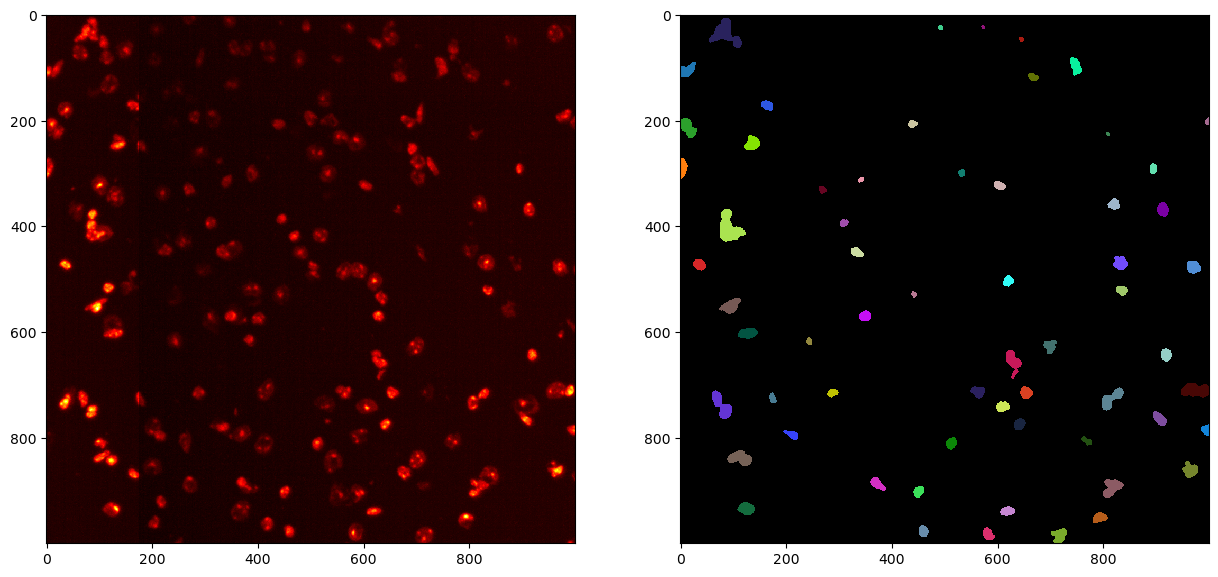

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(raw_image, plot=axs[0], color_map="hot")
cle.imshow(labeled_image, plot=axs[1], labels=True)

Try different values for spot_sigma and create a subplot where you compare them with the raw_image.

## 5. Number of nuclei
The labeled_image is an array of pixel values. All the pixels that belong to the background have a value of zero. All the pixels that belong to the same nucleus have the same value. With the command print(labeled_image[20]) you get all the pixel values for the 20th row of pixels. You can see that the neighbouring pixels from the same nucleus have the same values.

In [7]:
print(labeled_image[20])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

To get the number of nuclei you need the command max(). This command gives you the maximum value from the array. Since all the pixels from nucleus 1 have the value 1 and all the pixels of nucleus 2 have the value 2 and so on, the maximum value is equal to the number of nuclei.

In [8]:
number_of_nuclei = labeled_image.max()

print(f"This image contains {number_of_nuclei} nuclei.")

This image contains 62.0 nuclei.
